<a href="https://colab.research.google.com/github/rickiepark/SM-Summer-ML/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_07_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5384 - accuracy: 0.8105
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3931 - accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3557 - accuracy: 0.8704
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3336 - accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3183 - accuracy: 0.8841


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

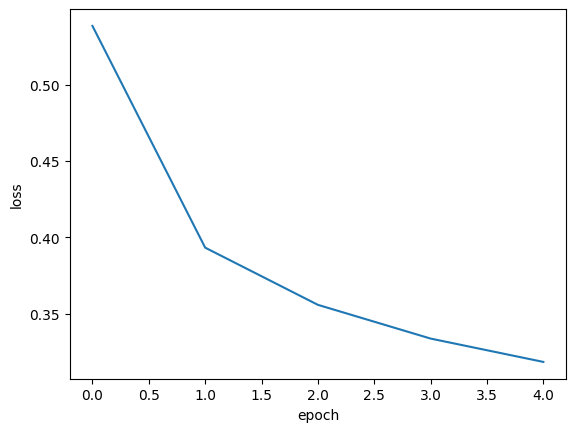

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

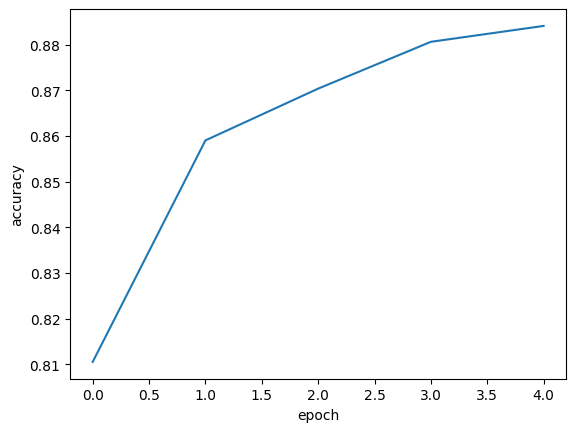

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5339 - accuracy: 0.8123 - val_loss: 0.4488 - val_accuracy: 0.8427
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3919 - accuracy: 0.8599 - val_loss: 0.4057 - val_accuracy: 0.8543
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3558 - accuracy: 0.8720 - val_loss: 0.3773 - val_accuracy: 0.8692
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3340 - accuracy: 0.8791 - val_loss: 0.3599 - val_accuracy: 0.8720
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3174 - accuracy: 0.8867 - val_loss: 0.3589 - val_accuracy: 0.8774
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3042 - accuracy: 0.8912 - val_loss: 0.3615 - val_accuracy: 0.8794
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.8956 - val_loss: 0.3871 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

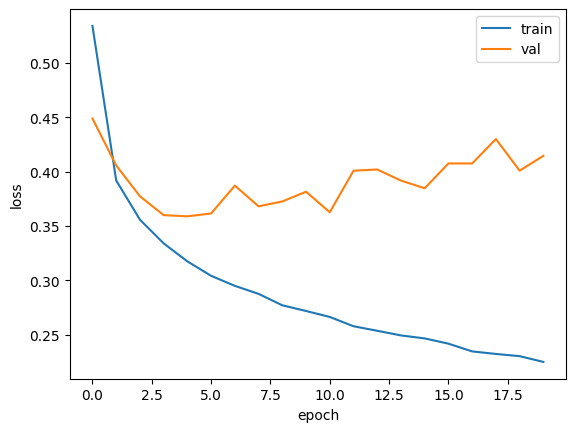

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))



Epoch 1/20
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5836 - accuracy: 0.7939 - val_loss: 0.4343 - val_accuracy: 0.8412
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4359 - accuracy: 0.8436 - val_loss: 0.3853 - val_accuracy: 0.8575
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4026 - accuracy: 0.8537 - val_loss: 0.3757 - val_accuracy: 0.8597
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3813 - accuracy: 0.8613 - val_loss: 0.3556 - val_accuracy: 0.8702
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3637 - accuracy: 0.8685 - val_loss: 0.3457 - val_accuracy: 0.8728
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3484 - accuracy: 0.8724 - val_loss: 0.3364 - val_accuracy: 0.8757
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3394 - accuracy: 0.8766 - val_loss: 0.3392 - val_accuracy:

NameError: name 'shistory' is not defined

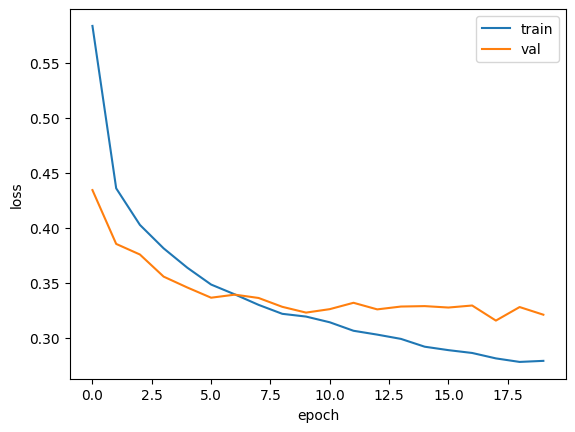

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = model_fn(keras.layers.Dropout(0,3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5236 - accuracy: 0.8179 - val_loss: 0.4829 - val_accuracy: 0.8298
Epoch 2/20
  47/1500 [..............................] - ETA: 4s - loss: 0.4649 - accuracy: 0.8384

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 5s 3ms/step - loss: 0.3950 - accuracy: 0.8583 - val_loss: 0.3873 - val_accuracy: 0.8608
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3528 - accuracy: 0.8714 - val_loss: 0.3687 - val_accuracy: 0.8670
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3270 - accuracy: 0.8805 - val_loss: 0.3502 - val_accuracy: 0.8736
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3075 - accuracy: 0.8885 - val_loss: 0.3365 - val_accuracy: 0.8786
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2913 - accuracy: 0.8926 - val_loss: 0.3520 - val_accuracy: 0.8761
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2790 - accuracy: 0.8973 - val_loss: 0.3383 - val_accuracy: 0.8776
Epoch 8/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2688 - accuracy: 0.9008 - val_loss: 0.3349 - val_accuracy: 0.8824
Epo

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8796


[0.36132487654685974, 0.8795833587646484]